In [24]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [25]:
IMAGE_SIZE = (224, 224)

In [26]:
train_directory='Train'
test_directory='Test'
val_directory='Valid'

In [27]:
# # add preprocessing layer to the front of VGG
# vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# # don't train existing weights
# for layer in vgg.layers:
#   layer.trainable = False

from tensorflow.keras.applications import ResNet50
# Load ResNet50 without top layers and with ImageNet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)  
# Freeze all layers of ResNet50
for layer in resnet.layers:
    layer.trainable = False

# # Add custom layers



In [28]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
x = resnet.output
x = GlobalAveragePooling2D()(x)

In [29]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define your parameters
IMAGE_SIZE = (224, 224)  # or whatever size you're using
NUM_CLASSES = 8  # Replace with your actual number of classes

# Load ResNet50 without top layers and with ImageNet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)  

# Freeze all layers of ResNet50
for layer in resnet.layers:
    layer.trainable = False

# Start building the model
x = resnet.output
x = GlobalAveragePooling2D()(x)

# Add dense layers with batch normalization and dropout
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)

x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)

x = Dense(256)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)

# Final output layer
output = Dense(NUM_CLASSES, activation='softmax')(x)  # Use 'sigmoid' for binary classification

# Create the model
model = Model(inputs=resnet.input, outputs=output)

# Compile the model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy',  # Use 'binary_crossentropy' for binary classification
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 27,669,640 (105.55 MB)

 Trainable params: 4,075,272 (15.55 MB)

 Non-trainable params: 23,594,368 (90.01 MB)

In [30]:
  # useful for getting number of classes
folders = glob('Train/*') 
len(folders)

8

In [31]:
# # our layers - you can add more if you want
# x = Flatten()(vgg.output)
# # x = Dense(1000, activation='relu')(x)
# prediction = Dense(len(folders), activation='softmax')(x)

In [32]:
# # create a model object
# model = Model(inputs=vgg.input, outputs=prediction)

# # view the structure of the model
# model.summary()

In [33]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [34]:
# from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 29675 images belonging to 8 classes.
Found 29675 images belonging to 8 classes.


In [35]:
print(len(training_set))
print(len(test_set))

928
928


In [37]:
# Callbacks
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
callbacks = [
    ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
]

# Compile
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training
# history = model.fit(
#     training_set,
#     steps_per_epoch=len(training_set),
#     validation_data=test_set,
#     validation_steps=len(test_set),
#     epochs=100,
#     callbacks=callbacks
# )


In [38]:
# Training
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    validation_data=test_set,
    validation_steps=len(test_set),
    epochs=100
)

Epoch 1/100
226/928 ━━━━━━━━━━━━━━━━━━━━ 1:16:43 7s/step - accuracy: 0.3227 - loss: 1.8645

KeyboardInterrupt: 

In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save('crop_pest_classification_model.h5')

In [ ]:
from keras.models import load_model
# from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.utils import load_img, img_to_array

model1 = load_model('crop_pest_classification_model.h5',compile=False)  

In [ ]:
lab = training_set.class_indices
lab={k:v for v,k in lab.items()}

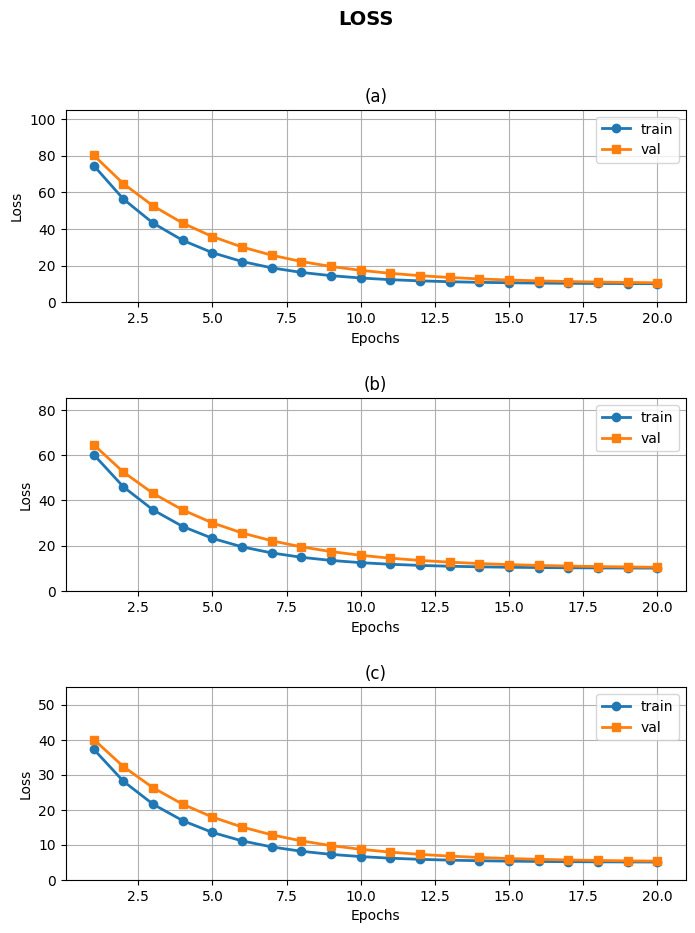

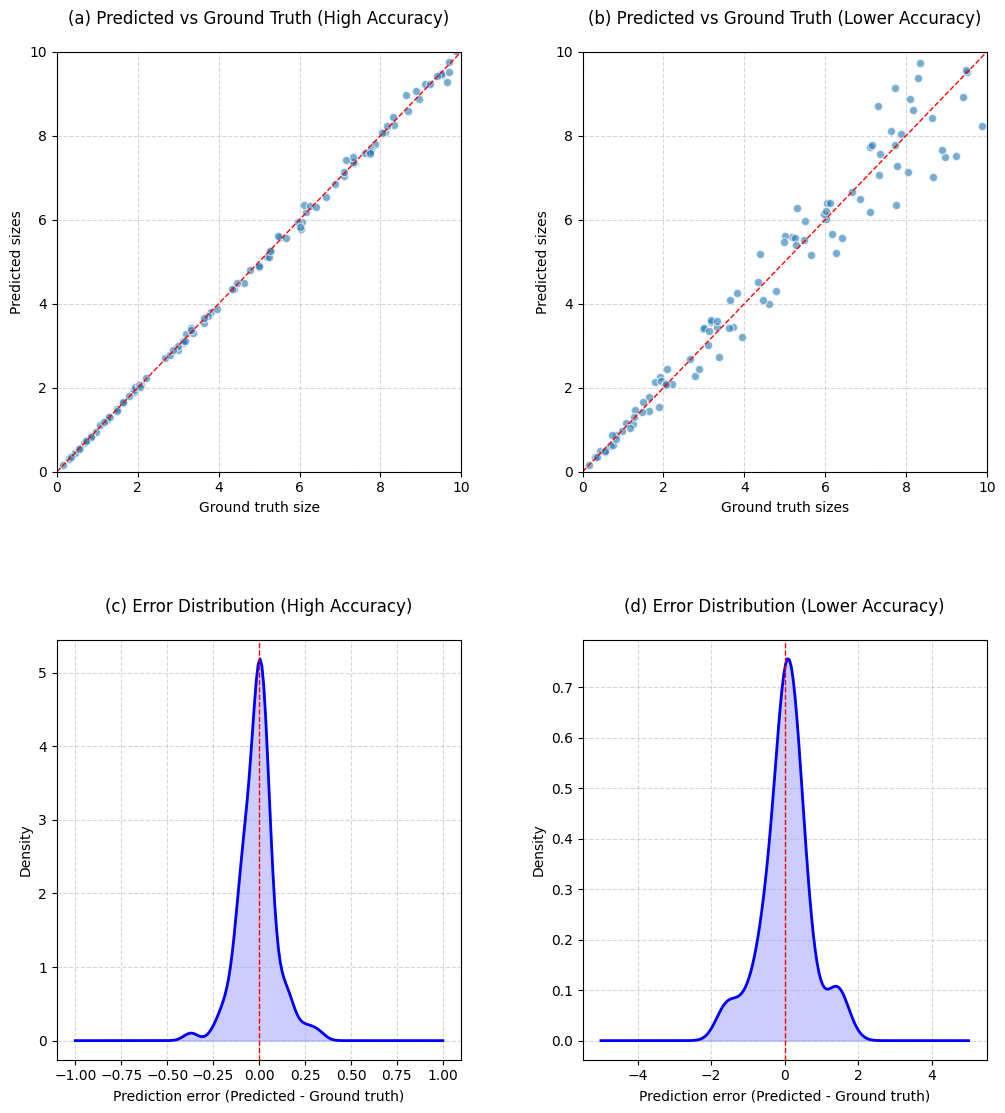

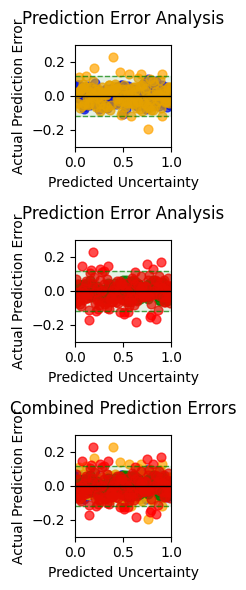

In [1]:
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res
import model_preset

Crop_classification

In [ ]:

img= r"Train\\Rice\blast_5.jpg"
pic=load_img( img ,target_size=(100,100,3))
plt.imshow(pic)
output(img)

Pest_Classification

In [ ]:

img= r"Train\\Rice_Pest\\armyworm\\jpg_0.jpg"
pic=load_img( img ,target_size=(100,100,3))
plt.imshow(pic)
output(img)